Here deterministic strategies: LO, LI, and RI.
For ω_n (I ... I)_m define n == m for, where n is [2, 30]

# Import the dependencies

In [1]:
import sys
from tqdm import tqdm

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *

Lambda = Abstraction
App = Application

# Defining test term:
    ω_n (I ... I)_m

In [2]:
def i_term():
    x = Var()
    x_ = Atom(x)
    return Lambda(x, x_)


def omega_term(n: int):
    x = Var()
    x_ = Atom(x)
    body_app_term = x_
    for _ in range(n - 1):
        body_app_term = App(body_app_term, x_)
    return Lambda(x, body_app_term)


def multi_i_term(m: int):
    app_term = i_term()
    for _ in range(m - 1):
        app_term = App(app_term, i_term())
    return app_term


def omega_multi_i_term(n: int, m: int):
    return App(omega_term(n), multi_i_term(m))

# Drawing stuff

In [5]:
import matplotlib.pyplot as plt


def draw_mult_lines(
    comp_data: dict, title="title", x_label="x_label", y_label="y_label"
):
    for key in comp_data.keys():
        plt.plot(
            range(2, len(comp_data[key][0]) + 2), comp_data[key][0], comp_data[key][1], label=key
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

# Run through strategies
## LO

In [3]:
nm_pairs = [(x, x) for x in range(2, 30+2)]

In [4]:
lo_steps = []
strategy = LOStrategy()
for n, m in tqdm(nm_pairs):
    term = omega_multi_i_term(n, m)
    _, norm_steps = term.normalize(strategy, is_limited=False)
    lo_steps.append(norm_steps)

100%|██████████| 30/30 [01:41<00:00,  3.40s/it]


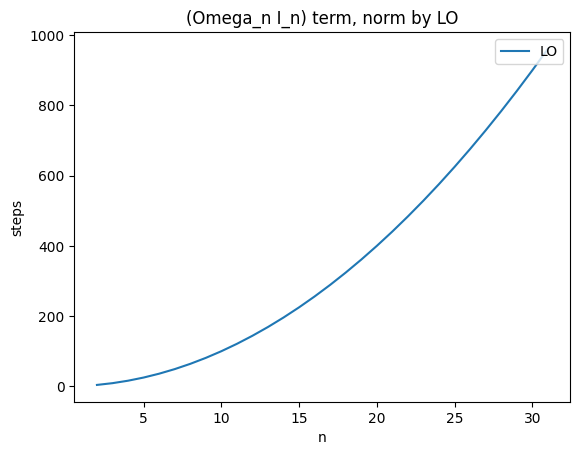

In [7]:
context = {
    "LO": (lo_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by LO", x_label="n", y_label="steps")

## LI

In [8]:
li_steps = []
strategy = LIStrategy()
for n, m in tqdm(nm_pairs):
    term = omega_multi_i_term(n, m)
    _, norm_steps = term.normalize(strategy, is_limited=False)
    li_steps.append(norm_steps)

100%|██████████| 30/30 [00:00<00:00, 85.47it/s] 


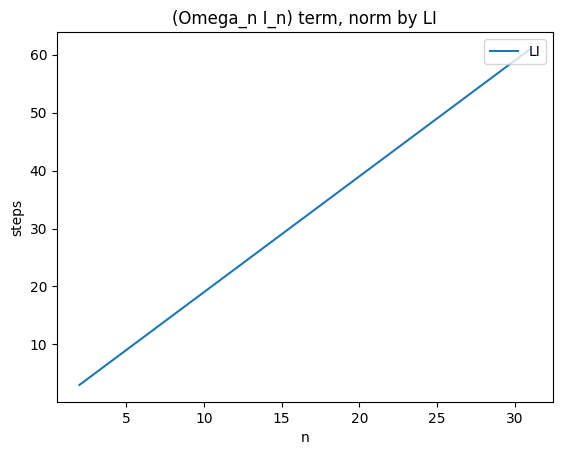

In [9]:
context = {
    "LI": (li_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by LI", x_label="n", y_label="steps")

## RI

In [10]:
ri_steps = []
strategy = RIStrategy()
for n, m in tqdm(nm_pairs):
    term = omega_multi_i_term(n, m)
    _, norm_steps = term.normalize(strategy, is_limited=False)
    ri_steps.append(norm_steps)

100%|██████████| 30/30 [00:00<00:00, 85.96it/s] 


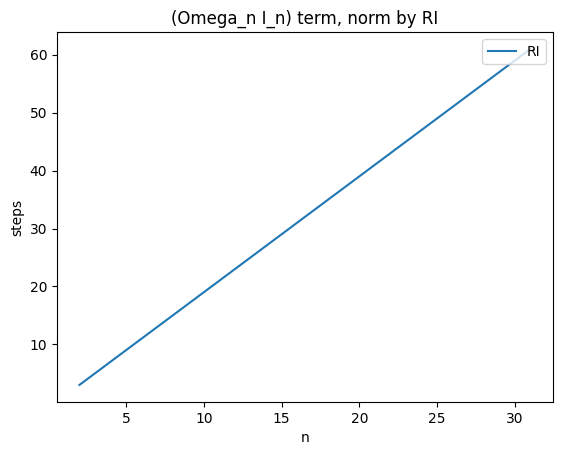

In [11]:
context = {
    "RI": (ri_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by RI", x_label="n", y_label="steps")

# Plot graphics comparisons
## LO vs LI

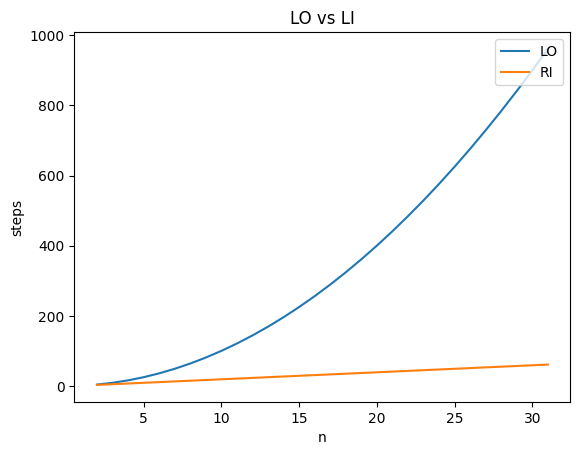

In [12]:
context = {
    "LO": (lo_steps, "-"),
    "RI": (ri_steps, "-"),
}

draw_mult_lines(comp_data=context, title="LO vs LI", x_label="n", y_label="steps")